# Summary statistics of clinically relevant benchmarks (19.05.2021)

In [127]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [128]:
DATASETS = 'overall_unique_datasets_19-05-2021.csv'

In [129]:
datasets_df = pd.read_csv(DATASETS,  lineterminator='\n')
datasets_df.head()

,Name (or description if no name available),Task,Mapped task,Id(s) of mapped task,Data basis,Has evaluation criteria?,Metrics,Data splits,Accessibility,Data license,...,Clinical relevance,Primary target group of task,Link: Source publication(s),Link: Main reference,Link: Dataset,First time published,Language,Comment,Normalised task,Aliases\r
0,Heart Disease Data Set,Classification of Coronary Artery Disease,Image classification,https://identifiers.org/ito:ITO_01160,Clinical notes / EHR data,Yes,Not described,No,Public,Not stated,...,NaN,NaN,http://arxiv.org/abs/1812.02828v1,https://archive.ics.uci.edu/ml/datasets/Heart+...,NaN,NaN,English,NaN,NaN,\r
1,"""Clinical data set"": contains three corpora: p...",Classifying documents as relevant or irrelevan...,Text Classification,https://identifiers.org/ito:ITO_01150,Biomedical scientfic literature,Yes,"Certainty, Uncertainty, AUC,",No,On request,Not stated,...,Not relevant,NaN,https://pubmed.ncbi.nlm.nih.gov/24954015,NaN,NaN,NaN,English,NaN,NaN,\r
2,Arizona Disease Corpus (AZDC),Information extraction,Information Extraction,https://identifiers.org/ito:ITO_00705,Biomedical scientfic literature,Yes,Not described,Not described,Public,Not stated,...,Indirectly,NaN,https://pubmed.ncbi.nlm.nih.gov/25817970,http://diego.asu.edu/index.php?downloads=yes,NaN,2009.0,English,NaN,NaN,\r
3,20 disease articles of twitter data,Not applicable,NaN,NaN,Social media data,No,Not applicable,No,Unknown,NaN,...,NaN,NaN,https://arxiv.org/abs/1711.04305,NaN,NaN,NaN,English,NaN,NaN,\r
4,2011 MetaMapped Medline Baseline,Not applicable,NaN,NaN,Biomedical scientfic literature,No,Not applicable,No,Unknown,NaN,...,NaN,NaN,https://pubmed.ncbi.nlm.nih.gov/22195220,NaN,NaN,NaN,English,NaN,NaN,\r


### Total number of datasets

In [130]:
print('Total number of datasets: {0}'.format(datasets_df.shape[0]))

Total number of datasets: 472


### Total clinical relevance

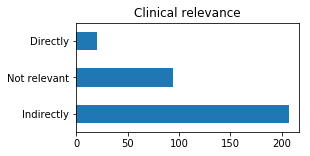

In [131]:
datasets_df['Clinical relevance'].value_counts().plot.barh(title='Clinical relevance', figsize=(4,2))

### Only benchmarks (= publicly available and has evaluation criteria)

In [132]:
# Filter for evaluation criteria
benchmarks_df = datasets_df[datasets_df['Has evaluation criteria?']!='No']
# Filter for availabiluity
benchmarks_df = benchmarks_df[benchmarks_df['Accessibility']!='Unknown']
benchmarks_df = benchmarks_df[benchmarks_df['Accessibility']!='Not available']

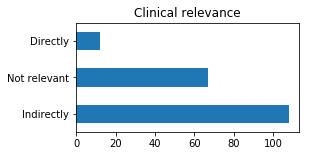

In [133]:
benchmarks_df['Clinical relevance'].value_counts().plot.barh(title='Clinical relevance', figsize=(4,2))

### Top 10 tasks of directly relevant benchmarks

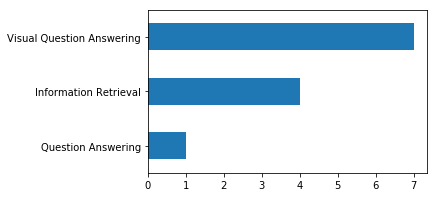

In [142]:
directly_relevant_df = benchmarks_df.loc[benchmark_df['Clinical relevance'] == 'Directly']
tasks_directly_relevant = directly_relevant_df['Mapped task'].value_counts().sort_values()[-10:].plot.barh(figsize=(5,3)) 

tasks_directly_relevant.figure.savefig('tasks_directly_relevant.png', bbox_inches='tight', dpi=300)

### Top 10 tasks of indirectly relevant benchmarks

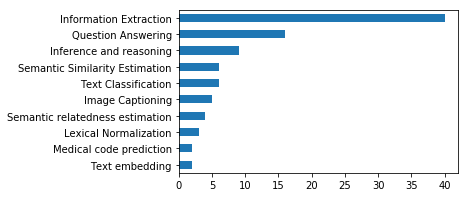

In [145]:
indirectly_relevant_df = benchmarks_df.loc[benchmark_df['Clinical relevance'] == 'Indirectly']
tasks_indirectly_relevant = indirectly_relevant_df['Mapped task'].value_counts().sort_values()[-10:].plot.barh(figsize=(5,3))

tasks_indirectly_relevant.figure.savefig('tasks_indirectly_relevant.png', bbox_inches='tight', dpi=300)

### Source data type

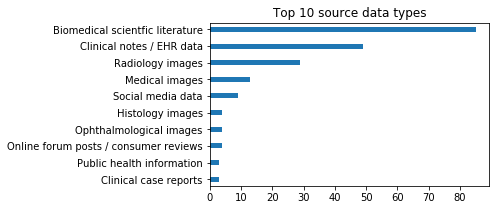

In [136]:
benchmarks_df['Data basis'] = benchmarks_df['Data basis'].str.split(';', expand=True)
df = pd.get_dummies(benchmarks_df['Data basis']).sum()

df = df.sort_values()[-10:]
source_data_types_plot = df.plot.barh(width=0.3, figsize=(5,3), title='Top 10 source data types')
source_data_types_plot.figure.savefig('source_data_types_plot.jpg', bbox_inches='tight', dpi=300)

In [137]:
datasets_df['Clinical relevance'].value_counts()
benchmarks_df['Clinical relevance'].value_counts()

Indirectly      108
Not relevant     67
Directly         12
Name: Clinical relevance, dtype: int64

In [138]:
# Non-benchmarks
non_benchmarks_df = datasets_df.loc[(datasets_df['Has evaluation criteria?']=='No') | 
                       (datasets_df['Accessibility']=='Unknown') |      
                        (datasets_df['Accessibility']=='Not available')]
non_benchmarks_df['Clinical relevance'].value_counts()


Indirectly      99
Not relevant    27
Directly         8
Name: Clinical relevance, dtype: int64

                                Non-benchmark datasets  Benchmarks
Indirectly clinically relevant                      99         108
Not clinically relevant                             27          67
Directly clinically relevant                         8          12


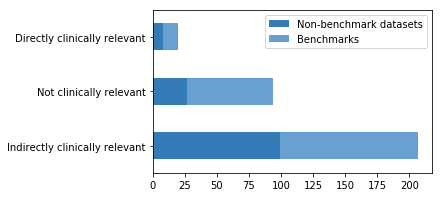

In [139]:
overview_df = pd.concat([non_benchmarks_df['Clinical relevance'].value_counts(), benchmarks_df['Clinical relevance'].value_counts()],  axis=1, keys=['Non-benchmark datasets', 'Benchmarks'])
overview_df.index = ['Indirectly clinically relevant', 'Not clinically relevant', 'Directly clinically relevant']
print(overview_df)
overview_fig = overview_df.plot.barh(stacked=True, figsize=(5,3), color=['#337AB7', '#69a0cf'])
overview_fig.figure.savefig('overview_df.png', bbox_inches='tight', dpi=300)